# MS&E 349: Homework 4
## Group 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

/Users/chih-hsuankao/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/scipy/__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.2)
  UserWarning)


### Predict monthly S&P 500 index returns with the following financial variables:

<img src="financial_variables.png" width="700">

In [2]:
df = pd.read_csv('ret_predictors.csv')
df['yyyymm'] = pd.to_datetime(df['yyyymm'], format='%Y%m', errors='coerce').dropna()

# shift the targeting y (last column) by 1
df['ret'] = df['ret (S&P 500 annualized log return including dividends)'].shift(periods=-1)

df

,Unnamed: 0,yyyymm,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,d/p,d/y,e/p,d/e,ret (S&P 500 annualized log return including dividends),ret
0,1,1927-01-01,0.443706,0.0323,0.0466,0.0561,0.0351,0.050834,0.002692,-0.011299,0.0075,0.0056,0.000470,-2.942374,-2.963349,-2.374773,-0.567601,-0.005579,0.040566
1,2,1927-02-01,0.428501,0.0329,0.0467,0.0559,0.0347,0.051682,0.002742,-0.005714,0.0088,0.0069,0.000287,-2.979535,-2.932946,-2.430353,-0.549182,0.040566,0.002610
2,3,1927-03-01,0.469765,0.0320,0.0462,0.0554,0.0331,0.046370,0.002667,-0.005747,0.0253,0.0083,0.000924,-2.976535,-2.970053,-2.445079,-0.531456,0.002610,0.010907
3,4,1927-04-01,0.456754,0.0339,0.0458,0.0548,0.0333,0.050518,0.002825,0.000000,-0.0005,0.0055,0.000603,-2.984225,-2.967143,-2.471309,-0.512916,0.010907,0.057096
4,5,1927-05-01,0.434783,0.0333,0.0457,0.0550,0.0327,0.055279,0.002775,0.005780,0.0109,-0.0011,0.000392,-3.025963,-2.975058,-2.531446,-0.494518,0.057096,-0.025705
5,6,1927-06-01,0.452385,0.0307,0.0458,0.0555,0.0334,0.058826,0.002558,0.011494,-0.0069,0.0043,0.000825,-3.007309,-3.016743,-2.531330,-0.475979,-0.025705,0.081687
6,7,1927-07-01,0.414553,0.0296,0.0460,0.0555,0.0333,0.059754,0.002467,-0.017045,0.0050,0.0003,0.000426,-3.061144,-2.998173,-2.603707,-0.457437,0.081687,0.028624
7,8,1927-08-01,0.396227,0.0270,0.0456,0.0548,0.0329,0.054526,0.002250,-0.005780,0.0076,0.0083,0.001276,-3.095764,-3.052225,-2.656742,-0.439023,0.028624,0.049095
8,9,1927-09-01,0.380586,0.0268,0.0454,0.0542,0.0330,0.094617,0.002233,0.005814,0.0018,0.0149,0.001123,-3.129097,-3.086791,-2.707759,-0.421338,0.049095,-0.048960
9,10,1927-10-01,0.413801,0.0308,0.0451,0.0538,0.0325,0.094370,0.002567,0.005780,0.0099,0.0055,0.001559,-3.065650,-3.120203,-2.662875,-0.402774,-0.048960,0.064270


In this problem, we are going to use the data from January 1927 to January 1985 as the training set, the data from February 1985 to January 1997 as the validation set and and the data from January 1997 to Nov 2017 as the test set. 

Report the MSE and R-squared for the training, validation and test data for each of the following methods and briefly interpret the results.

In [3]:
df = df.set_index(df['yyyymm'])

df_train = df['1927-01-01':'1985-02-01']
df_validation = df['1985-02-01':'1997-01-01']
df_test = df['1997-01-01':].dropna() # drop row with na

print('Train Dataset:',df_train.shape)
print('Validation Dataset:',df_validation.shape)
print('Test Dataset:',df_test.shape)

Train Dataset: (698, 19)
Validation Dataset: (144, 19)
Test Dataset: (251, 19)


In [4]:
X_train = df_train.loc[:, 'b/m':'d/e'].to_numpy()
y_train = df_train['ret'].to_numpy()

X_validation = df_validation.loc[:, 'b/m':'d/e'].to_numpy()
y_validation = df_validation['ret'].to_numpy()

X_test = df_test.loc[:, 'b/m':'d/e'].to_numpy()
y_test = df_test['ret'].to_numpy()

print('Train X shape:',X_train.shape)
print('Train Y shape:',y_train.shape)
print('Validation X shape:',X_validation.shape)
print('Validation Y shape:',y_validation.shape)
print('Test X shape:',X_test.shape)
print('Test Y shape:',y_test.shape)

Train X shape: (698, 15)
Train Y shape: (698,)
Validation X shape: (144, 15)
Validation Y shape: (144,)
Test X shape: (251, 15)
Test Y shape: (251,)


## 1. Linear Model

In [5]:
regr = linear_model.LinearRegression()

In [6]:
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 6.14445366e-02 -4.46310302e+04  8.93883395e-01  1.50118456e-01
 -1.31223497e+00 -5.90874643e-02  5.35571580e+05 -7.59587409e-01
 -1.15216619e-01  1.61071656e-01  2.34259229e-01  1.67941016e+06
  8.62247957e-02 -1.67941027e+06 -1.67941031e+06]


In [7]:
regr_pred_train = regr.predict(X_train)
regr_pred_validation = regr.predict(X_validation)
regr_pred_test = regr.predict(X_test)

In [8]:
print("========Train========")
print('MSE: %.6f' % mean_squared_error(y_train, regr_pred_train))
print('R_squared: %.6f' % r2_score(y_train, regr_pred_train))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(y_validation, regr_pred_validation))
print('R_squared: %.6f' % r2_score(y_validation, regr_pred_validation))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(y_test, regr_pred_test))
print('R_squared: %.6f' % r2_score(y_test, regr_pred_test))

========Train========
MSE: 0.003427
R_squared: 0.051918
======Validation======
MSE: 0.002209
R_squared: -0.280197
=========Test=========
MSE: 0.002390
R_squared: -0.300502


## 2. Penalized Linear Model

In [9]:
from sklearn.linear_model import Lasso, LassoCV #Q2.1
from sklearn.linear_model import Ridge, RidgeCV #Q2.2
from sklearn.linear_model import ElasticNet, ElasticNetCV #Q2.3

### Let $\rho$ = 0 (i.e. Lasso), find the optimal $\lambda$ from the “cross validation” set and report the MSE and $R^2$ in the training, cross validation and test sets.

In [10]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_validation, y_validation) # cross-validation

lasso = Lasso(max_iter = 10000, normalize = True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0006030459741131299, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
print('Optimal lambda from cross validation is ', lassocv.alpha_)

Optimal lambda from cross validation is  0.0006030459741131299


In [12]:
lasso_pred_train = lasso.predict(X_train)
lasso_pred_validation = lasso.predict(X_validation)
lasso_pred_test = lasso.predict(X_test)

In [13]:
print("========Train========")
print('MSE: %.6f' % mean_squared_error(y_train, lasso_pred_train))
print('R_squared: %.6f' % r2_score(y_train, lasso_pred_train))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(y_validation, lasso_pred_validation))
print('R_squared: %.6f' % r2_score(y_validation, lasso_pred_validation))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(y_test, lasso_pred_test))
print('R_squared: %.6f' % r2_score(y_test, lasso_pred_test))

========Train========
MSE: 0.003615
R_squared: 0.000000
======Validation======
MSE: 0.001758
R_squared: -0.019107
=========Test=========
MSE: 0.001838
R_squared: -0.000172


### Let $\rho$ = 1 (i.e. Ridge Regression), find the optimal $\lambda$ and report the MSE and $R^2$ as part 1.

In [14]:
ridgecv = RidgeCV(normalize = True)
ridgecv.fit(X_validation, y_validation)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)

In [15]:
print('Optimal lambda from cross validation is ', ridgecv.alpha_)

Optimal lambda from cross validation is  10.0


In [16]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)

ridge_pred_train = ridge.predict(X_train)
ridge_pred_validation = ridge.predict(X_validation)
ridge_pred_test = ridge.predict(X_test)

In [17]:
print("========Train========")
print('MSE: %.6f' % mean_squared_error(y_train, ridge_pred_train))
print('R_squared: %.6f' % r2_score(y_train, ridge_pred_train))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(y_validation, ridge_pred_validation))
print('R_squared: %.6f' % r2_score(y_validation, ridge_pred_validation))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(y_test, ridge_pred_test))
print('R_squared: %.6f' % r2_score(y_test, ridge_pred_test))

========Train========
MSE: 0.003584
R_squared: 0.008494
======Validation======
MSE: 0.001767
R_squared: -0.024088
=========Test=========
MSE: 0.001846
R_squared: -0.004782


### Find the optimal $\lambda$ and $\rho$ $(0 \leq \rho \leq 1)$ and report the estimation errors as part 1.

In [18]:
elasticcv = ElasticNetCV(normalize = True)
elasticcv.fit(X_validation, y_validation)

/Users/chih-hsuankao/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=True, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [19]:
print('Optimal lambda from cross validation is ', elasticcv.alpha_)
print('Optimal rho from cross validation is ', elasticcv.l1_ratio_)

Optimal lambda from cross validation is  0.0012060919482262586
Optimal rho from cross validation is  0.5


In [20]:
elastic = ElasticNet(alpha = elasticcv.alpha_,  l1_ratio = elasticcv.l1_ratio_, normalize = True)
elastic.fit(X_train, y_train)

elastic_pred_train = elastic.predict(X_train)
elastic_pred_validation = elastic.predict(X_validation)
elastic_pred_test = elastic.predict(X_test)

In [21]:
print("========Train========")
print('MSE: %.6f' % mean_squared_error(y_train, elastic_pred_train))
print('R_squared: %.6f' % r2_score(y_train, elastic_pred_train))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(y_validation, elastic_pred_validation))
print('R_squared: %.6f' % r2_score(y_validation, elastic_pred_validation))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(y_test, elastic_pred_test))
print('R_squared: %.6f' % r2_score(y_test, elastic_pred_test))

========Train========
MSE: 0.003615
R_squared: 0.000000
======Validation======
MSE: 0.001758
R_squared: -0.019107
=========Test=========
MSE: 0.001838
R_squared: -0.000172


## 3. Principle Component Regression

In [22]:
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [23]:
pd_X_train = df_train.loc[:, 'b/m':'d/e']
pd_y_train = df_train.loc[:, 'ret (S&P 500 annualized log return including dividends)']

pd_X_validation = df_validation.loc[:, 'b/m':'d/e']
pd_y_validation = df_validation.loc[:, 'ret (S&P 500 annualized log return including dividends)']

pd_X_test = df_test.loc[:, 'b/m':'d/e']
pd_y_test = df_test.loc[:, 'ret (S&P 500 annualized log return including dividends)']

pd_X_train = df_train.loc[:, 'b/m':'d/e']
pd_y_train = df_train['ret']

pd_X_validation = df_validation.loc[:, 'b/m':'d/e']
pd_y_validation = df_validation['ret']

pd_X_test = df_test.loc[:, 'b/m':'d/e']
pd_y_test = df_test['ret']

In [24]:
pca = PCA()
regr = linear_model.LinearRegression()
X_reduced_validation = pca.fit_transform(scale(pd_X_validation))
n = len(X_reduced_validation)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), 
                                           pd_y_validation.ravel(), 
                                           cv = kf_10, 
                                           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the top 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, 
                                               X_reduced_validation[:,:i], 
                                               pd_y_validation.ravel(), 
                                               cv=kf_10, 
                                               scoring='neg_mean_squared_error').mean()
    mse.append(score)

/Users/chih-hsuankao/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


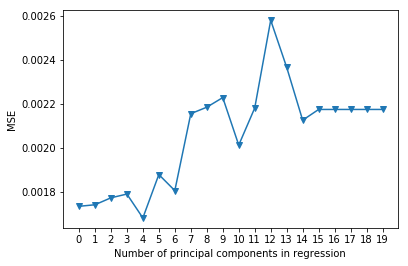

In [25]:
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1)
plt.xticks(np.arange(0, 20, step=1))
plt.show()

### From here, we found that the lowest cross-validation error occurs when num_components=4 are used.

In [26]:
# Train pcr model on training data 
pcr = linear_model.LinearRegression()
X_reduced_train = pca.fit_transform(scale(pd_X_train))
pcr.fit(X_reduced_train[:,:4], pd_y_train)

X_reduced_test = pca.fit_transform(scale(pd_X_test))[:,:4]
X_reduced_validation = pca.fit_transform(scale(pd_X_validation))[:,:4]

# print(X_reduced_train.shape)
# print(X_reduced_test.shape)
# print(X_reduced_validation.shape)

In [27]:
pcr_pred_train = pcr.predict(X_reduced_train[:,:4])
pcr_pred_validation = pcr.predict(X_reduced_validation)
pcr_pred_test = pcr.predict(X_reduced_test)

In [28]:
print("========Train========")
print('MSE: %.6f' % mean_squared_error(pd_y_train, pcr_pred_train))
print('R_squared: %.6f' % r2_score(pd_y_train, pcr_pred_train))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(pd_y_validation, pcr_pred_validation))
print('R_squared: %.6f' % r2_score(pd_y_validation, pcr_pred_validation))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(pd_y_test, pcr_pred_test))
print('R_squared: %.6f' % r2_score(pd_y_test, pcr_pred_test))

========Train========
MSE: 0.003555
R_squared: 0.016550
======Validation======
MSE: 0.001738
R_squared: -0.007024
=========Test=========
MSE: 0.001878
R_squared: -0.022258


## 4. Partial Least Squares

In [29]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

/Users/chih-hsuankao/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


(-1, 14.65)

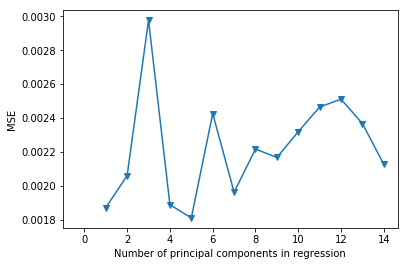

In [30]:
n = len(pd_X_validation)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 15):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, 
                                            scale(pd_X_validation), 
                                            pd_y_validation, 
                                            cv = kf_10, 
                                            scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 15), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1)

### From here, we found that the low cross-validation errors occur when around K=5 partial least squares dimensions are used. 

In [31]:
pls = PLSRegression(n_components=5)
pls.fit(scale(pd_X_train), pd_y_train)

print("========Train========")
print('MSE: %.6f' % mean_squared_error(pd_y_train, pls.predict(scale(pd_X_train))))
print('R_squared: %.6f' % r2_score(pd_y_train, pls.predict(scale(pd_X_train))))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(pd_y_validation, pls.predict(scale(pd_X_validation))))
print('R_squared: %.6f' % r2_score(pd_y_validation, pls.predict(scale(pd_X_validation))))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(pd_y_test, pls.predict(scale(pd_X_test))))
print('R_squared: %.6f' % r2_score(pd_y_test, pls.predict(scale(pd_X_test))))

========Train========
MSE: 0.003481
R_squared: 0.037093
======Validation======
MSE: 0.001723
R_squared: 0.001596
=========Test=========
MSE: 0.002182
R_squared: -0.187290


## 5. Regression Tree

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [33]:
model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 10),
                                'max_leaf_nodes': range(2, 100, 4)},
                  cv = 5, #(default) 5-fold cross validation
                  n_jobs = 1,
                  scoring = 'neg_mean_squared_error')

gs.fit(X_validation, y_validation)

print(gs.best_params_,'correpond to L and K respectively')
#print(-gs.best_score_)

{'max_depth': 2, 'max_leaf_nodes': 30} correpond to L and K respectively


/Users/chih-hsuankao/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
dtr = DecisionTreeRegressor(max_depth = 2,
                            max_leaf_nodes = 34) #TBD

In [35]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=34, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [36]:
dtr_pred_train = dtr.predict(X_train)
dtr_pred_validation = dtr.predict(X_validation)
dtr_pred_test = dtr.predict(X_test)

In [37]:
print("========Train========")
print('MSE: %.6f' % mean_squared_error(y_train, dtr_pred_train))
print('R_squared: %.6f' % r2_score(y_train, dtr_pred_train))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(y_validation, dtr_pred_validation))
print('R_squared: %.6f' % r2_score(y_validation, dtr_pred_validation))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(y_test, dtr_pred_test))
print('R_squared: %.6f' % r2_score(y_test, dtr_pred_test))

========Train========
MSE: 0.002774
R_squared: 0.232629
======Validation======
MSE: 0.001756
R_squared: -0.017647
=========Test=========
MSE: 0.003811
R_squared: -1.074157


## 6. Boosted Regression Tree

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
model = GradientBoostingRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth':range(1, 15, 1),
                                'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2],
                                'n_estimators': range(1, 150, 2)},
                  n_jobs = 4, # run in parallel, adjust this with #CPU/#GPU
                  scoring = 'neg_mean_squared_error')

gs.fit(X_validation, y_validation)

print(gs.best_params_,'correpond to v, L and B respectively')
#print(-gs.best_score_)

/Users/chih-hsuankao/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.0001, 'max_depth': 10, 'n_estimators': 1} correpond to v, L and B respectively


In [40]:
brt = GradientBoostingRegressor(max_depth = 7,
                                learning_rate = 0.001,
                                n_estimators = 1) #TBD
brt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [41]:
brt_pred_train = brt.predict(X_train)
brt_pred_validation = brt.predict(X_validation)
brt_pred_test = brt.predict(X_test)

In [42]:
print("========Train========")
print('MSE: %.6f' % mean_squared_error(y_train, brt_pred_train))
print('R_squared: %.6f' % r2_score(y_train, brt_pred_train))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(y_validation, brt_pred_validation))
print('R_squared: %.6f' % r2_score(y_validation, brt_pred_validation))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(y_test, brt_pred_test))
print('R_squared: %.6f' % r2_score(y_test, brt_pred_test))

========Train========
MSE: 0.003612
R_squared: 0.000922
======Validation======
MSE: 0.001758
R_squared: -0.019103
=========Test=========
MSE: 0.001838
R_squared: -0.000301


## 7. Random Forests

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model = RandomForestRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth':range(1, 15, 1),
                                'n_estimators': range(1, 150, 1)},
                  n_jobs = 4, # run in parallel, adjust this with #CPU/#GPU
                  scoring = 'neg_mean_squared_error')

gs.fit(X_validation, y_validation)

print(gs.best_params_,'correpond to L and B respectively')
#print(-gs.best_score_)

{'max_depth': 1, 'n_estimators': 2} correpond to L and B respectively


In [46]:
rfr = RandomForestRegressor(max_depth = 5,
                            n_estimators = 3) #TBD
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
rfr_pred_train = rfr.predict(X_train)
rfr_pred_validation = rfr.predict(X_validation)
rfr_pred_test = rfr.predict(X_test)

In [48]:
print("========Train========")
print('MSE: %.6f' % mean_squared_error(y_train, rfr_pred_train))
print('R_squared: %.6f' % r2_score(y_train, rfr_pred_train))
print("======Validation======")
print('MSE: %.6f' % mean_squared_error(y_validation, rfr_pred_validation))
print('R_squared: %.6f' % r2_score(y_validation, rfr_pred_validation))
print("=========Test=========")
print('MSE: %.6f' % mean_squared_error(y_test, rfr_pred_test))
print('R_squared: %.6f' % r2_score(y_test, rfr_pred_test))

========Train========
MSE: 0.002558
R_squared: 0.292405
======Validation======
MSE: 0.003548
R_squared: -1.056026
=========Test=========
MSE: 0.006392
R_squared: -2.478741
